# Human Activity Recognition (97.98 %)

## The above accuracy achieved is better than the research paper itself which was based on LSTM but my work includes ANN on the same dataset. 

**Original approach using LSTM -
Testing Accuracy: 91.652%    , 
Precision: 91.762%      , 
Recall: 91.652%     , 
f1_score: 91.643%
**

**My approach using ANN - Testing accuracy(validation): 97.98%  ,  Precision: 95% ,  Recall: 94%  , f1-score: 94% .**

In [54]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
print(os.listdir("../input"))

['train.csv', 'test.csv']


In [55]:
df = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [56]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
tBodyAcc-std()-Z,-0.913526,-0.960322,-0.978944,-0.990675,-0.990482,-0.99542,-0.983118,-0.981585,-0.983672,-0.986244,...,0.117919,0.0958697,0.0751283,0.118361,0.170019,0.0770781,0.05928,0.274533,0.268893,0.177404
tBodyAcc-mad()-X,-0.995112,-0.998807,-0.99652,-0.997099,-0.998321,-0.997627,-0.997003,-0.996485,-0.997596,-0.995405,...,-0.300133,-0.308265,-0.269247,-0.339273,-0.309599,-0.282301,-0.322552,-0.304515,-0.310487,-0.377404
tBodyAcc-mad()-Y,-0.983185,-0.974914,-0.963668,-0.98275,-0.979672,-0.990218,-0.966097,-0.966313,-0.957236,-0.973663,...,-0.102807,-0.112551,-0.0273262,-0.0888948,-0.0413923,0.0436156,-0.0294562,-0.098913,-0.0682003,-0.0386781
tBodyAcc-mad()-Z,-0.923527,-0.957686,-0.977469,-0.989302,-0.990441,-0.995549,-0.983116,-0.982982,-0.984379,-0.985642,...,0.181639,0.162174,0.110784,0.146128,0.207454,0.0604101,0.0805851,0.332584,0.319473,0.22943
tBodyAcc-max()-X,-0.934724,-0.943068,-0.938692,-0.938692,-0.942469,-0.942469,-0.940987,-0.940987,-0.940598,-0.940028,...,0.236195,0.185661,0.185661,0.118226,0.210795,0.210795,0.11744,0.0439988,0.101702,0.269013


In [57]:
print(df.Activity.unique())
print("----------------------------------------")
print(df.Activity.value_counts())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
----------------------------------------
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


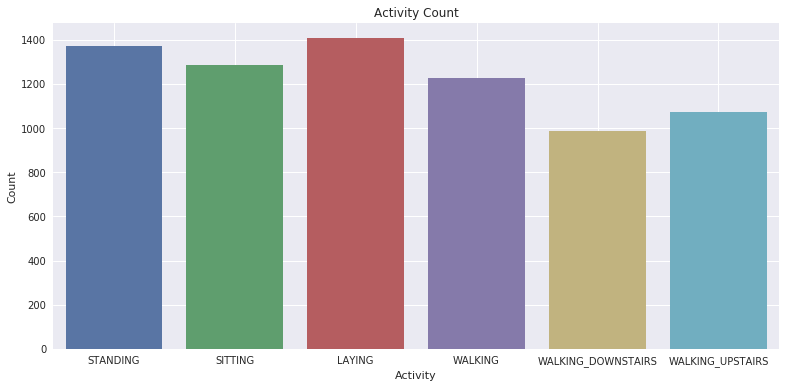

In [58]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = df)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [59]:
pd.crosstab(df.subject, df.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [60]:
print(df.shape , test.shape)

(7352, 563) (2947, 563)


In [61]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## Now some visualizations for feature distribution in space.

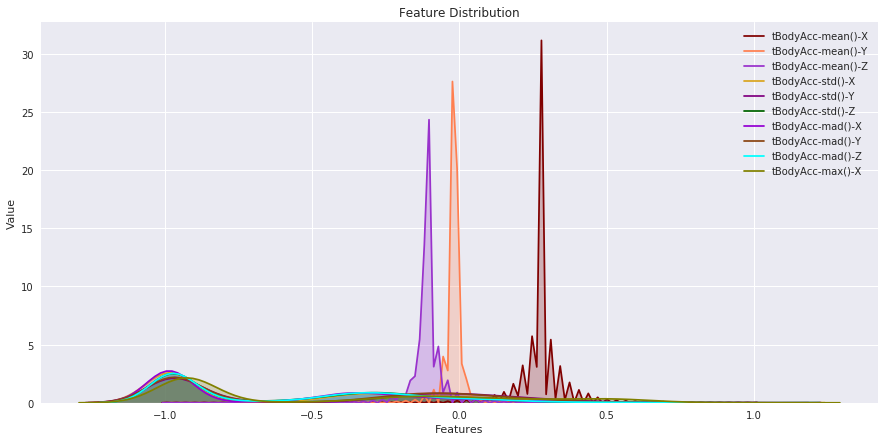

In [62]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

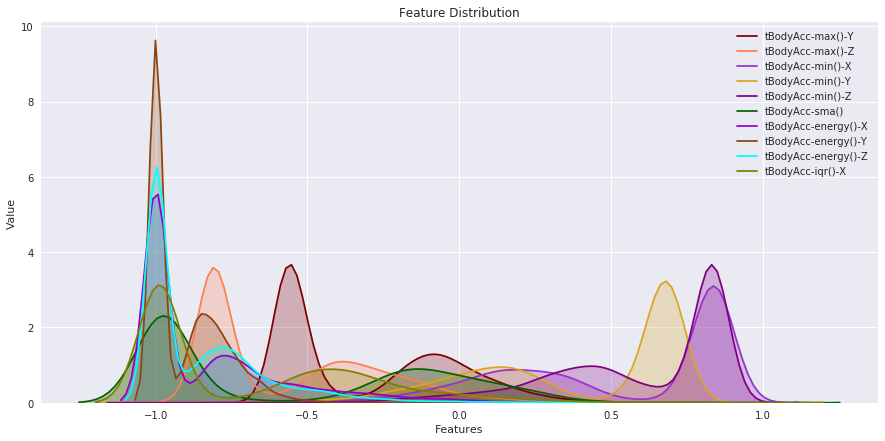

In [63]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

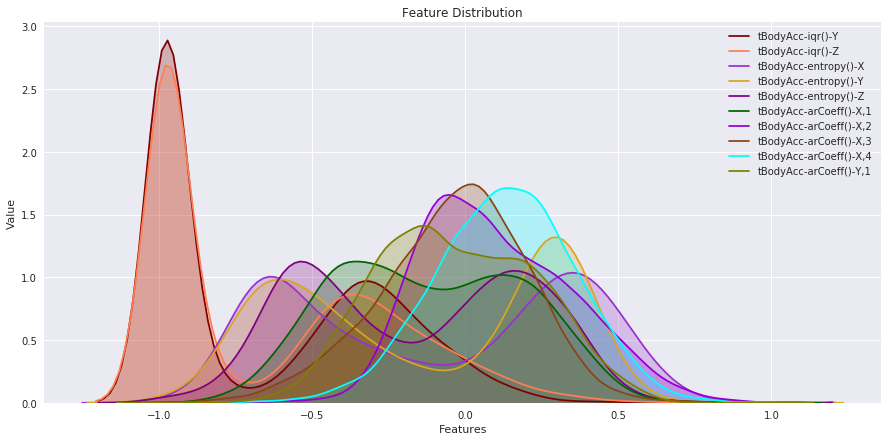

In [64]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

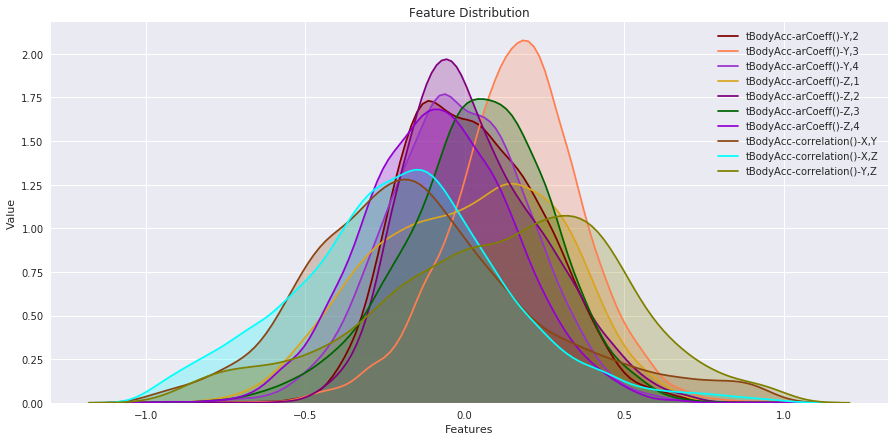

In [65]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

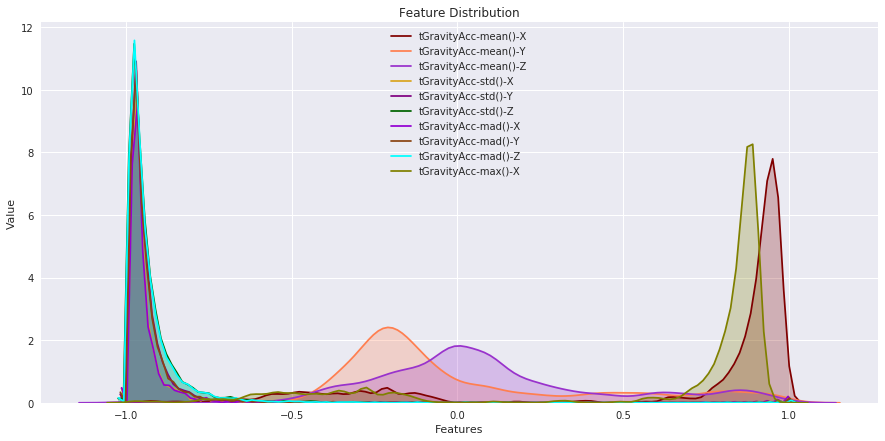

In [66]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[40:50]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

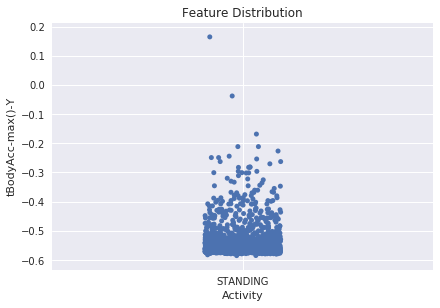

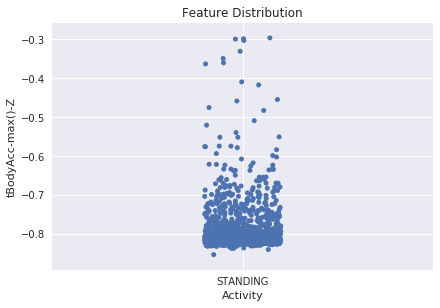

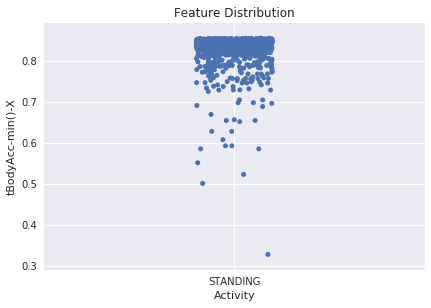

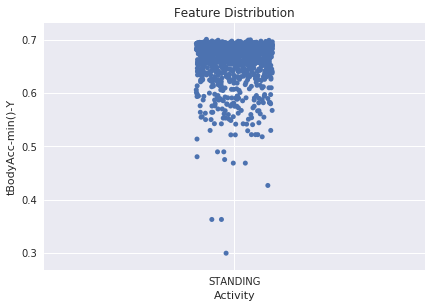

In [67]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
fig1 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,10], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)
plt.subplot(224)
fig2 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,11], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(223)
fig2 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,12], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(222)
fig2 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,13], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)

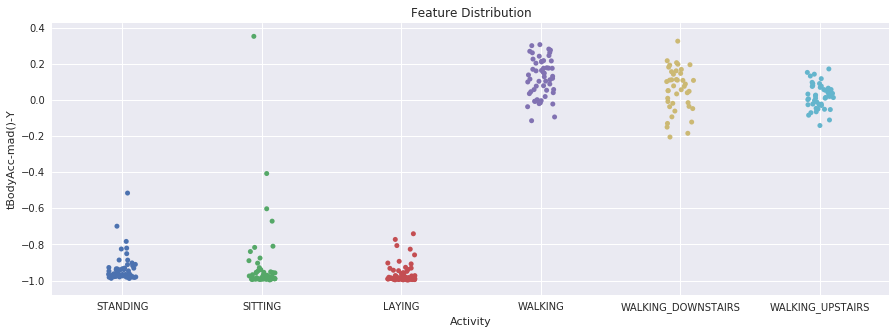

In [68]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= df.loc[df['subject']==15].iloc[:,7], data= df.loc[df['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

**Feature Scaling**

**Pre-processing and data preparation to feed data into Artificial Neural Network.**

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:562])
mat_train = scaler.transform(df.iloc[:,0:562])
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [70]:
scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562])
mat_test = scaler.transform(test.iloc[:,0:562])
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [71]:
temp = []
for i in df.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
df["n_Activity"] = temp

In [75]:
temp = []
for i in test.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
test["n_Activity"] = temp

In [72]:
df.drop(["Activity"] , axis = 1 , inplace = True)

In [77]:
test.drop(["Activity"] , axis = 1 , inplace = True)

In [82]:
from keras.utils import to_categorical
y_train = to_categorical(df.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

In [85]:
X_train = mat_train 
X_test = mat_test

**Though it is a 562 feature vector which is large enough and might cause overfitting while training.**

**Also gone for feature selection using extra tree classifier and l1 selection , but the results were slightly better with all features only when I tune the hyperparameters of the model to its almost utmost level which took some time.**

**Having less features will also take less time to train but in this case manual selection of features reagrding context can't be done and the other approach has already been discussed above.**

In [87]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


**Taking necessary callbacks of checkpointing and learning rate reducer.**

In [88]:
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/callbacks.py:919: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.


In [89]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

**The below model architecture is the best I could come up with after repeated tuning and changes in network architecture.**

**At last, the BatchNormalization layer did some good to slightly boost the accuracy.** 

**Taken special care of learning rate and batch_size to which the model is very sensitive and have to repeatedly adjust them in order to get one of the best result in front.**

In [194]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 64)                36032     
_________________________________________________________________
dense_110 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dense_111 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_112 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_113 (Dense)            (None, 32)                6304      
_________________________________________________________________
dense_114 (Dense)            (None, 6)                 198       
Total para

## Finally, the best model was checkpointed and got a validation loss of 0.0562 and a validation accuracy of 97.98% or ~98%.

In [195]:
history = model.fit(X_train, y_train , epochs=22 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Train on 7352 samples, validate on 2947 samples
Epoch 1/22
7352/7352 [==============================] - 2s 320us/step - loss: 0.4648 - acc: 0.7908 - val_loss: 0.2946 - val_acc: 0.8644

Epoch 00001: val_acc did not improve
Epoch 2/22
7352/7352 [==============================] - 0s 49us/step - loss: 0.1966 - acc: 0.9244 - val_loss: 0.1478 - val_acc: 0.9395

Epoch 00002: val_acc did not improve
Epoch 3/22
7352/7352 [==============================] - 0s 53us/step - loss: 0.0918 - acc: 0.9712 - val_loss: 0.0947 - val_acc: 0.9609

Epoch 00003: val_acc did not improve
Epoch 4/22
7352/7352 [==============================] - 0s 53us/step - loss: 0.0502 - acc: 0.9830 - val_loss: 0.1141 - val_acc: 0.9526

Epoch 00004: val_acc did not improve

Epoch 00004: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 5/22
7352/7352 [==============================] - 0s 46us/step - loss: 0.0370 - acc: 0.9878 - val_loss: 0.0652 - val_acc: 0.9742

Epoch 00005: val_acc improved from 0.9668

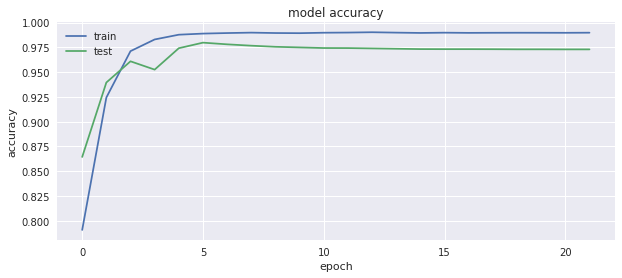

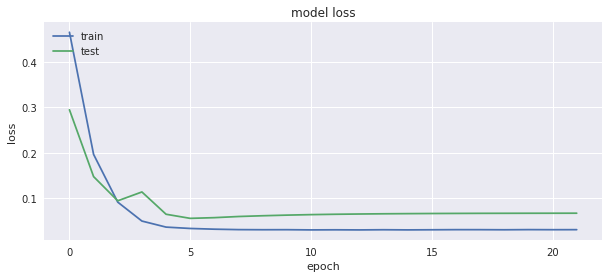

In [196]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [197]:
from sklearn.metrics import confusion_matrix
model.load_weights("HAR_weights.hdf5")
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

## The confusion matrix is plotted to get better insight of model performance using mlxted to refrain from extra code via scikit.

## The model performance is evident from the diagonal concentration of the values.**

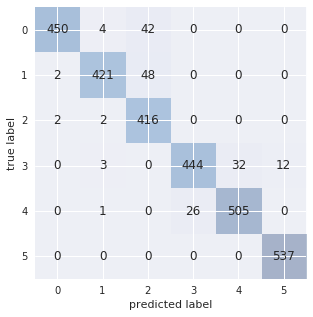

In [198]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

## Precision - 95% , Recall - 94% and f1-score of 94%.

In [199]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95       496
          1       0.98      0.89      0.93       471
          2       0.82      0.99      0.90       420
          3       0.94      0.90      0.92       491
          4       0.94      0.95      0.94       532
          5       0.98      1.00      0.99       537

avg / total       0.95      0.94      0.94      2947



**Exporting predictions.**

In [200]:
d = { "Index":np.arange(2947) , "Activity":pred }
final = pd.DataFrame(d)
final.to_csv( 'human_activity_predictions.csv' , index = False)